In [45]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#Loading the Data
df = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
df = df.dropna()

#List
nbh = df['neighborhood'].value_counts().sort_values(ascending=True)
print(nbh)

Regent Square                  5
East Carnegie                 10
Mt. Oliver                    10
Ridgemont                     10
St. Clair                     11
                            ... 
Hazelwood                    213
South Side Flats             218
Central Business District    220
Squirrel Hill South          223
Carrick                      252
Name: neighborhood, Length: 90, dtype: int64


Text(0, 0.5, 'Number of Fires')

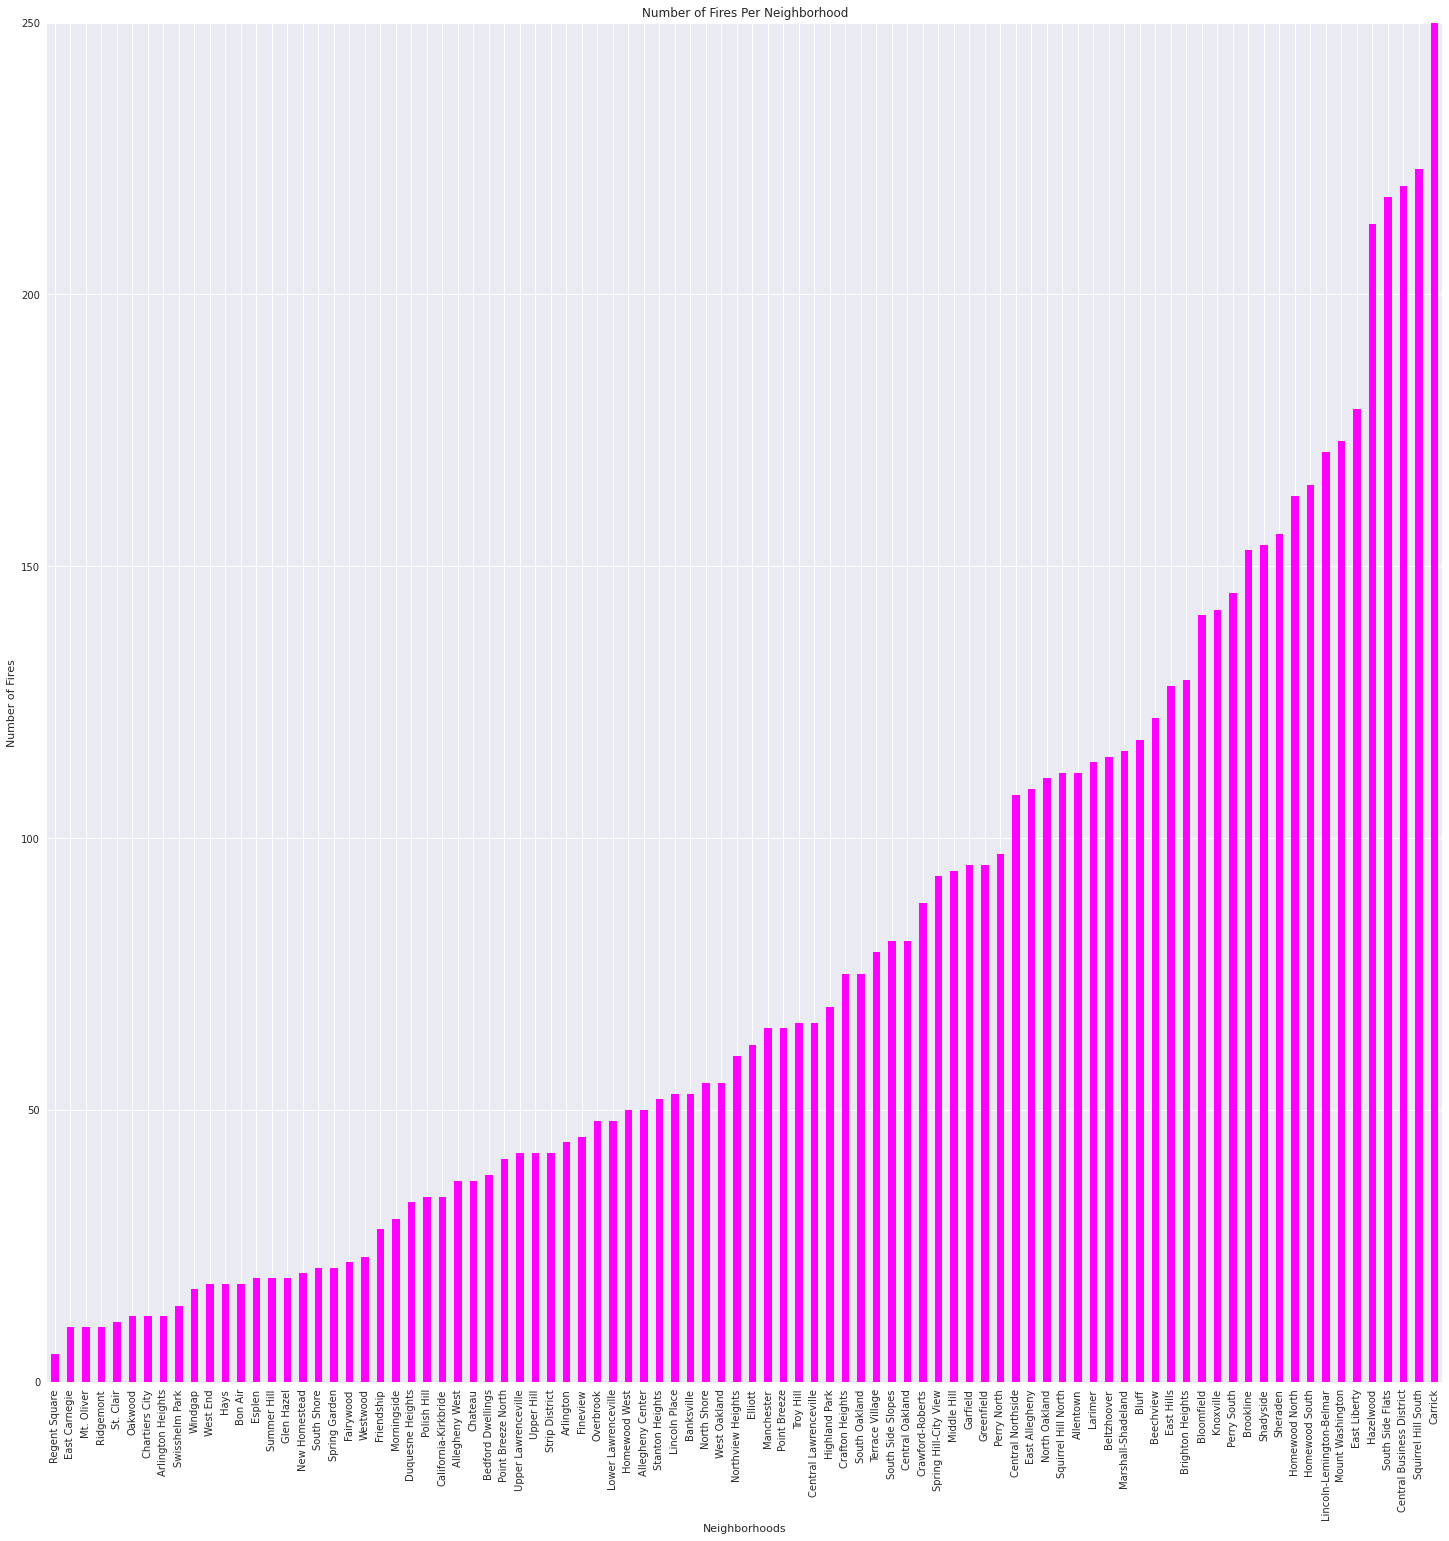

In [66]:
#Bar Graph
plt.style.use('seaborn')
nbh.plot.bar(figsize=(25,25), ylim=[0,250])
plt.title("Number of Fires Per Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Fires")

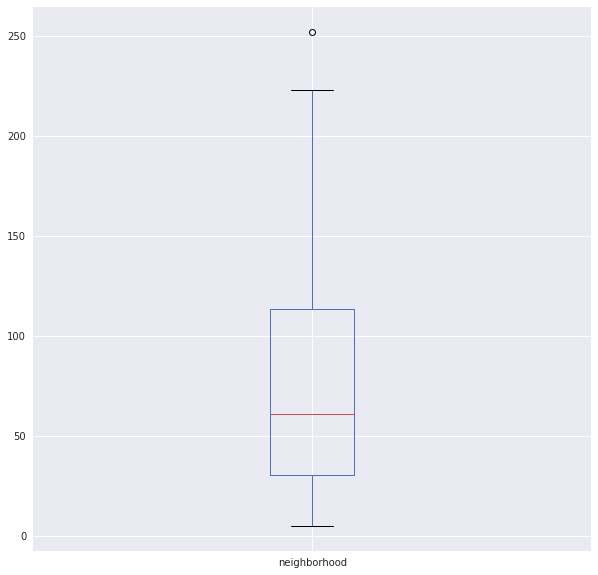

In [61]:
#Box Plot
nbh.plot.box(figsize=(10,10))

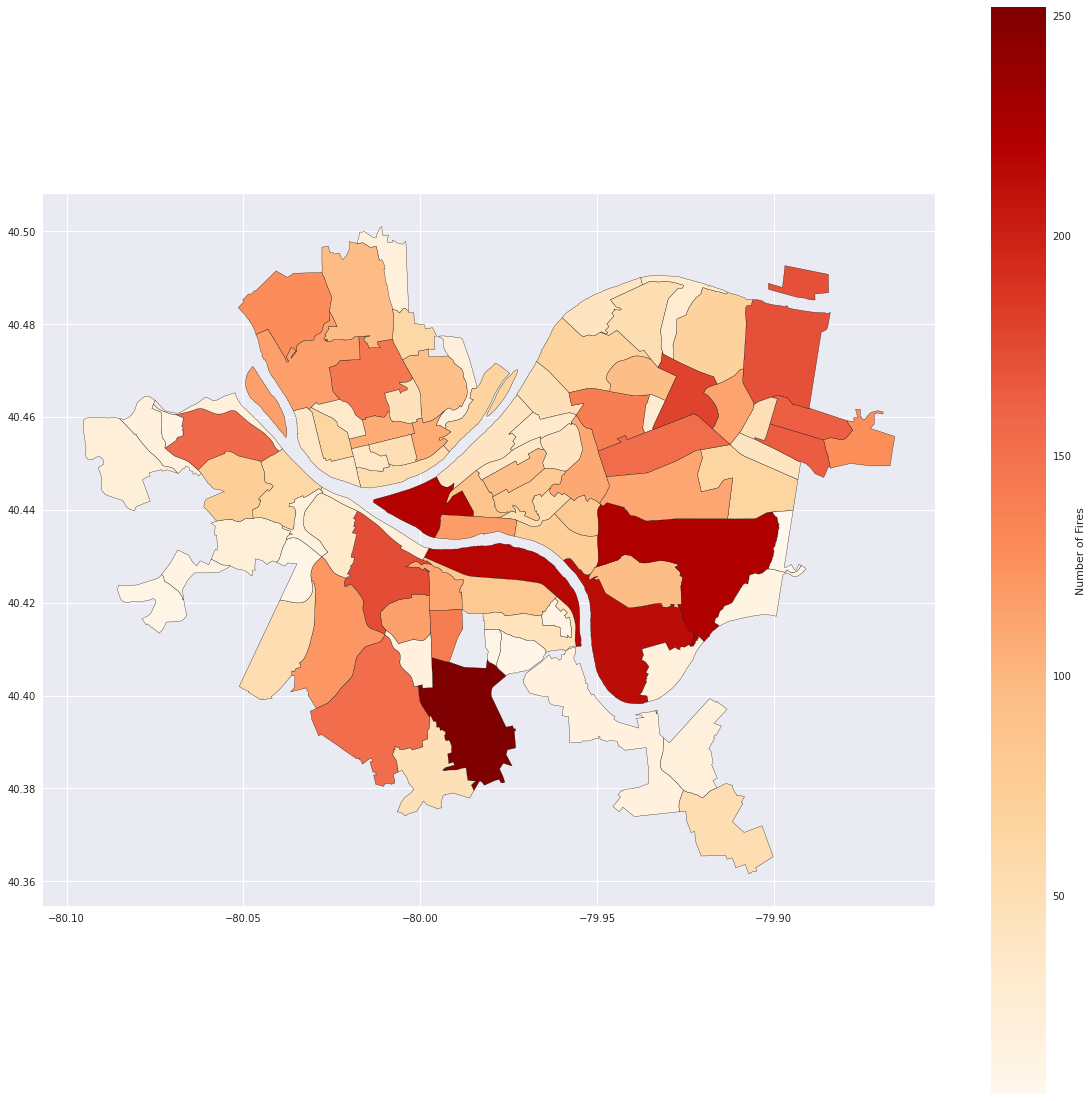

In [17]:
#Heat Map
count = 1
df["number_of_fires"] = count
num_fires = df.groupby("neighborhood").sum()['number_of_fires']
num_fires.sort_values(ascending=False)
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
fire_map = neighborhoods.merge(num_fires, how='left', left_on='hood',right_on='neighborhood')
fire_map.plot(column='number_of_fires', cmap='OrRd', edgecolor="black", legend=True, legend_kwds = {'label': "Number of Fires"}, figsize=(20,20))